In [19]:
import scanpy as sc
import scvelo as scv
import numpy as np
import os
from anndata import AnnData as ad

In [20]:
sc.settings.datasetdir="../../datasets/raw/"

Read dataset 

In [21]:
adata_raw = sc.datasets.pbmc3k()
adata_raw

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [22]:
adata_processed = sc.datasets.pbmc3k_processed()

In [23]:
adata_processed.X = adata_raw[list(adata_processed.obs.index), list(adata_processed.var.index)].X
adata_processed.layers["X_counts"] = adata_processed.X.copy()
adata_processed.obs = adata_processed.obs.rename(columns={"louvain": "cell_type"})

In [24]:
adata_raw = adata_raw[adata_processed.obs.index]

In [25]:
adata_raw.obs = adata_processed.obs.copy()

In [26]:
sc.pp.log1p(adata_processed)

In [27]:
sc.tl.pca(adata_processed)
sc.pp.neighbors(adata_processed)
sc.tl.umap(adata_processed)

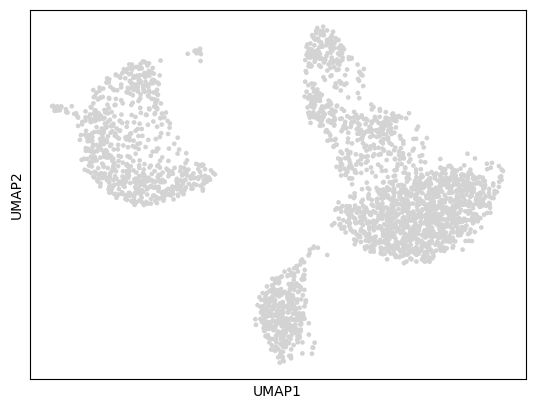

In [28]:
sc.pl.umap(adata_processed)

Save

In [29]:
ad.write_h5ad(adata_processed, "../../datasets/processed/pbmc3k.h5ad")

In [32]:
ad.write_h5ad(adata_raw, "../../datasets/raw/pbmc3k.h5ad")